In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# import data from previous wrangle and EDA notebooks
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [3]:
df_houses

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_houses.drop(columns =['Unnamed: 0','Id'], inplace=True)
Id = test['Id']
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [5]:
#split numeric features
df_houses_numeric = df_houses.select_dtypes([np.number])
df_test_numeric = test.select_dtypes([np.number])
df_houses_numeric = df_houses_numeric.drop(columns=['SalePrice'])
houses_num_col = df_houses_numeric.columns

In [6]:
df_houses_numeric.shape

(1459, 51)

In [7]:
df_houses_numeric.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [8]:
# examin outliers

q5, q95 = df_houses_numeric.quantile(.005, axis=0), df_houses_numeric.quantile(.995, axis=0)
iqr = q95 - q5


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


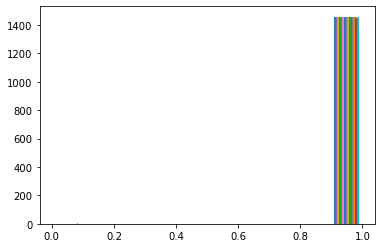

In [9]:
plt.hist((df_houses_numeric <= (q95 + iqr * 1.5)));

In [10]:
q95

MSSubClass         190.00
LotFrontage        152.71
LotArea          53423.67
OverallQual         10.00
OverallCond          9.00
YearBuilt         2009.00
YearRemodAdd      2009.00
MasVnrArea         959.63
ExterQual            5.00
ExterCond            4.00
BsmtQual             5.00
BsmtCond             4.00
BsmtExposure         4.00
BsmtFinType1         6.00
BsmtFinSF1        1753.66
BsmtFinType2         6.00
BsmtFinSF2        1049.46
BsmtUnfSF         1932.39
TotalBsmtSF       2430.08
HeatingQC            5.00
1stFlrSF          2434.43
2ndFlrSF          1533.65
LowQualFinSF       457.63
GrLivArea         3431.92
BsmtFullBath         2.00
BsmtHalfBath         1.00
FullBath             3.00
HalfBath             2.00
BedroomAbvGr         5.71
KitchenAbvGr         2.00
KitchenQual          5.00
TotRmsAbvGrd        12.00
Fireplaces           2.00
FireplaceQu          5.00
GarageYrBlt       2009.00
GarageFinish         3.00
GarageCars           3.00
GarageArea        1064.36
GarageQual  

In [11]:
# save outliers to be removed later
drop_out = df_houses_numeric[(df_houses_numeric > (q95 + iqr * 1.5)).any(axis=1)]

drop_out


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold
197,75,174.0,25419,8,4,1918,1990,0.0,4,4,...,16,552,0,0,512,5,5,0,3,2006
249,50,60.0,159000,6,7,1958,2006,472.0,4,3,...,98,0,0,0,0,0,0,500,6,2007
313,20,150.0,215245,7,5,1965,1965,0.0,3,3,...,0,0,0,0,0,0,0,0,6,2009
335,190,60.0,164660,5,6,1965,1965,0.0,3,3,...,0,0,0,0,0,0,0,700,8,2008
346,20,60.0,12772,6,8,1960,1998,0.0,3,4,...,0,0,0,0,0,0,0,15500,4,2007
810,20,78.0,10140,6,6,1974,1999,99.0,3,3,...,0,0,0,0,648,2,5,0,1,2006
1170,80,76.0,9880,6,6,1977,1977,0.0,3,3,...,0,0,0,0,576,4,5,0,7,2008
1182,60,160.0,15623,10,5,1996,1996,0.0,4,3,...,78,0,0,0,555,5,4,0,7,2007
1230,90,60.0,18890,5,5,1977,1977,1.0,3,3,...,24,145,0,0,0,0,0,8300,8,2007
1298,60,313.0,63887,10,5,2008,2008,796.0,5,3,...,292,0,0,0,480,4,0,0,1,2008


In [12]:
drop_out.shape

(12, 51)

In [13]:
# scale numeric features

from sklearn.preprocessing import RobustScaler  
scaler = RobustScaler ()

df_houses_numeric = scaler.fit_transform(df_houses_numeric)

# test is transform only
df_test_numeric = scaler.transform(df_test_numeric)

In [14]:
#replacing numeric features with scaled versions

df_houses_numeric = pd.DataFrame(df_houses_numeric, columns=houses_num_col)
df_houses[houses_num_col] = df_houses_numeric

In [15]:
#drop outliers from train only

df_houses.drop(drop_out.index, inplace=True)

In [16]:
#replacing numeric features in test with scaled versions

df_test_numeric = pd.DataFrame(df_test_numeric, columns=houses_num_col)
test[houses_num_col] = df_test_numeric

In [18]:
df_houses.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [19]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)
df_test = pd.get_dummies(test)

In [20]:

dif_test = df_train.columns.difference(df_test.columns).values
#dif_test

In [21]:
# not all dummie features in both sets. We'll fill with 0s to match shapes
df_test[dif_test] = 0

In [22]:
dif_train = df_test.columns.difference(df_train.columns).values
df_train[dif_train] = 0

In [23]:
#remove sales price column from test it got added on with the numeric values
df_test= df_test.drop(columns=['SalePrice'])

In [24]:
#double check the dataframe
df_houses.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [25]:
df_train.shape

(1447, 234)

In [26]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MiscFeature_Gar2
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,...,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.0
mean,0.135936,0.258429,0.153375,0.046994,0.574292,-0.037980,-0.247408,0.625963,0.395301,0.082239,...,0.083621,0.002073,0.867312,0.068417,0.002764,0.007602,0.013822,0.821700,0.085695,0.0
std,0.845741,1.109175,1.508585,0.689681,1.113156,0.657909,0.558992,1.095251,0.573678,0.350078,...,0.276915,0.045502,0.339355,0.252548,0.052522,0.086887,0.116791,0.382897,0.280009,0.0
min,-0.600000,-2.210526,-2.017020,-2.500000,-4.000000,-2.195652,-1.189189,0.000000,-1.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-0.600000,-0.157895,-0.487667,-0.500000,0.000000,-0.413043,-0.729730,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,0.000000,0.000000,-0.009373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,0.400000,0.842105,0.500493,0.500000,1.000000,0.597826,0.270270,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,2.800000,13.157895,26.066108,2.000000,4.000000,0.804348,0.432432,9.726444,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [27]:
df_test.shape

(1459, 233)

In [28]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)